<a href="https://colab.research.google.com/github/edwinsalazar/AdvDataViz/blob/main/outcome/14%20Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions

In [2]:
import pandas as pd
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')
for item in os.listdir():
  print(item)
print("--------------")
os.chdir('/content/drive/MyDrive/cloud/GitHub/AdvDataViz/Notebooks/')
for item in os.listdir():
  print(item)
print("--------------")
notebooks = "/content/drive/MyDrive/cloud/GitHub/AdvDataViz/Notebooks"
print(os.listdir(notebooks))
print("--------------")

file = "heart-disease.csv"
file_path = os.path.join(notebooks, file)
with open(file_path, "r") as f:
  contents = f.read()

#df = pd.read_csv("heart-disease.csv")
df = pd.read_csv(file_path)

df["sex"] = df["sex"].map({"male":0, "female":1})
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
learningStore
healthyCar
startup
cloud
Artificial Intelligence
--------------
03 Matplotlib  - Exercise.ipynb
02 Matplotlib.ipynb
01 Python_Pandas.ipynb
04 Continuous Variables - Histogram .ipynb
05 Continuous Variables - Histogram - Exercise .ipynb
07 Continuous Variables - Boxplot - Exercise .ipynb
03 Matplotlib - Exercise Solutions.ipynb
05 Continuous Variables - Histogram - Exercise Solutions.ipynb
06 Continuous Variables - Boxplot.ipynb
08 Continuous Variables - Scatterplot.ipynb
07 Continuous Variables - Boxplot - Exercise Solutions.ipynb
09 Continuous Variables - Scatterplot - Exercise Solutions.ipynb
09 Continuous Variables - Scatterplot - Exercise .ipynb
10 Categorical Variables - Bar_Pie.ipynb
12 Seaborn.ipynb
11 Pandas Data Visualization.ipynb
13 Seaborn - Exercise .ipynb
Top 50 US Tech Companies.csv
13 Seaborn - Exercise Solution.ipynb
15 Custom M

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,1,3,145,233,150,2.3,1
1,37,1,2,130,250,187,3.5,1
2,41,0,1,130,204,172,1.4,1
3,56,1,1,120,236,178,0.8,1
4,57,0,0,120,354,163,0.6,1


In [6]:
age = df["age"]

---

# Histogram

In [7]:
def hist(data, color="dodgerblue", label="Age"):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    ax.hist(data, color=color, edgecolor="black")

    ax.set_title('Histogram', fontsize=16)
    ax.set_xlabel(label, fontsize=16);


#### Call the hist() function

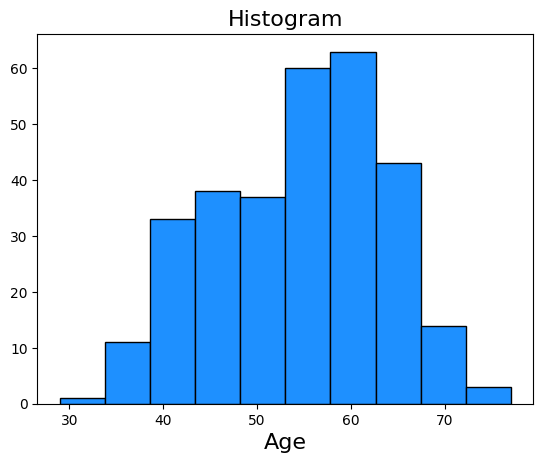

In [8]:
# use default color
hist(age)

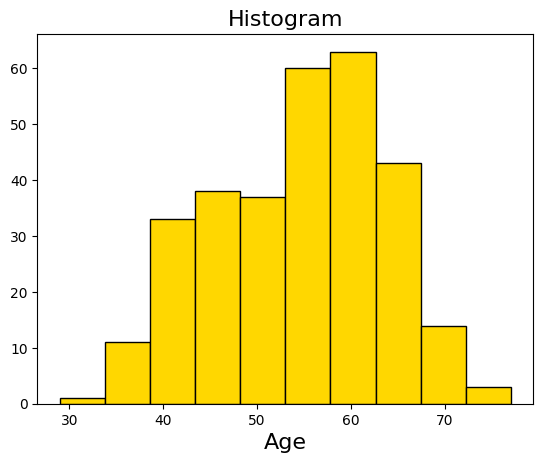

In [9]:
# use custom color
hist(age, color="gold")

---

# Boxplot

In [16]:
def boxplot(data, labels=[1], median_color="black", patch_artist=False, box_color=["dodgerblue"]):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize = (5, 3))

    bplot = ax.boxplot(data, patch_artist=patch_artist,
#                             medianprops={"color":median_color, "linewidth":2}, tick_labels=labels)
                             medianprops={"color":median_color, "linewidth":2})

    if patch_artist:
        for patch, color in zip(bplot['boxes'], box_color):
            patch.set_facecolor(color);

#### Call the boxplot() function

NameError: name 'ax' is not defined

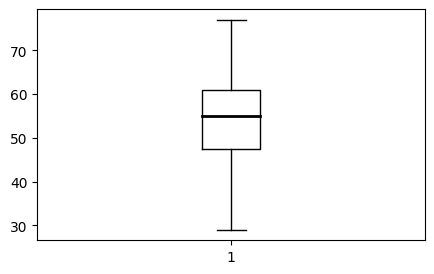

In [17]:
# use defaults
boxplot(age)
ax.set_xticklabels(labels)

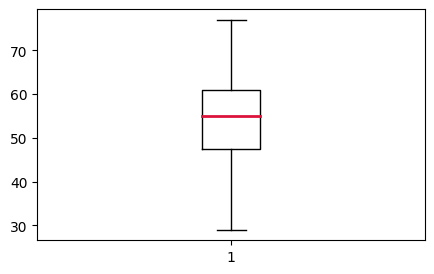

In [18]:
# set the label and the median color
boxplot(age, labels=["age"], median_color="crimson")

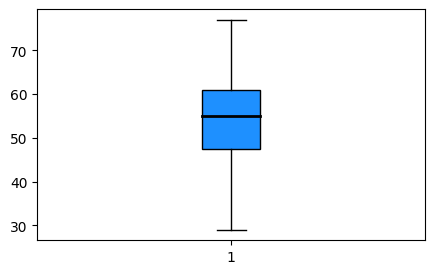

In [19]:
# use default box color
boxplot(age, labels=["age"], patch_artist=True)

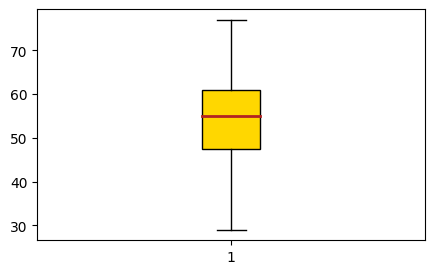

In [20]:
# use custom median and box colors
boxplot(age, labels=["age"], median_color="firebrick", patch_artist=True, box_color=["gold"])

---

# Scatterplot

In [21]:
def scatter(x, y, alpha=.3, size=200, color="mediumblue"):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    ax.scatter(x=x, y=y, alpha=alpha, s = size, c = color);

In [22]:
age = df["age"]
max_hr = df["max_hr"]
sex = df["sex"]

#### Call the scatter() function

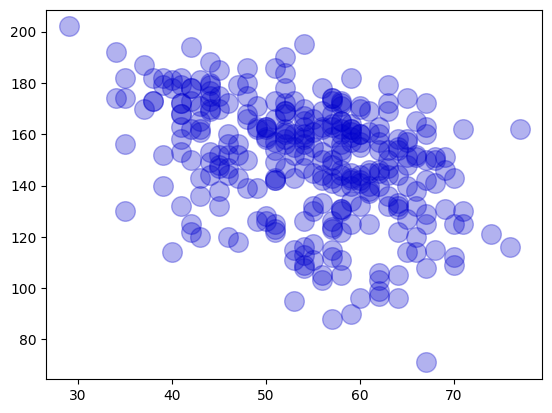

In [23]:
# use default color
scatter(age, max_hr)

#### Map the color to a categorical column

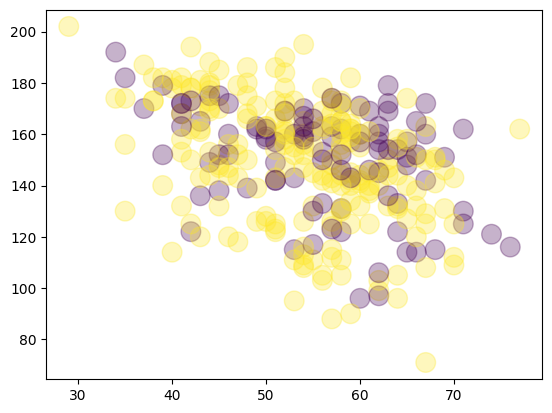

In [24]:
scatter(age, max_hr, color=sex)

---

# Barplot

In [26]:
def bar(labels, height, color="deepskyblue"):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    ax.bar(x=labels, height=height, color=color, edgecolor="black")

In [27]:
# make "age" a categorical variable

df["age_groups"] = pd.cut(df["age"], [29, 39, 49, 59, 69, 79],
                          labels=["thirties","forties","fifties","sixties", "seventies"])

height = df["age_groups"].value_counts()
height

,count
age_groups,
fifties,125
sixties,80
forties,72
thirties,15
seventies,10


#### Call the bar() function

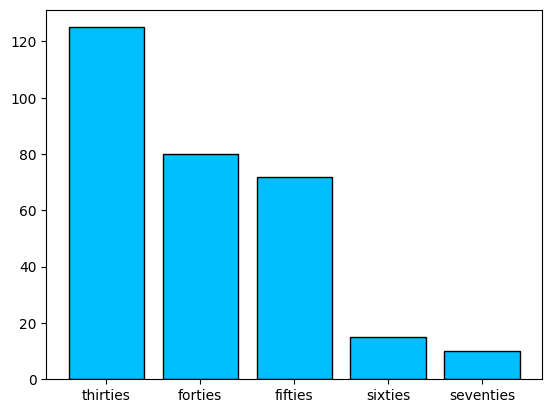

In [28]:
# use default color
bar(labels=["thirties","forties","fifties","sixties", "seventies"], height=height)

---

# Pie Chart

In [29]:
def pie(labels, values, colors):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize = (15, 5))
    ax.pie(x=values, labels=labels, colors=colors, autopct='%.1f%%',
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True});

In [30]:
values = df["age_groups"].value_counts()
values

,count
age_groups,
fifties,125
sixties,80
forties,72
thirties,15
seventies,10


#### Call the pie() function

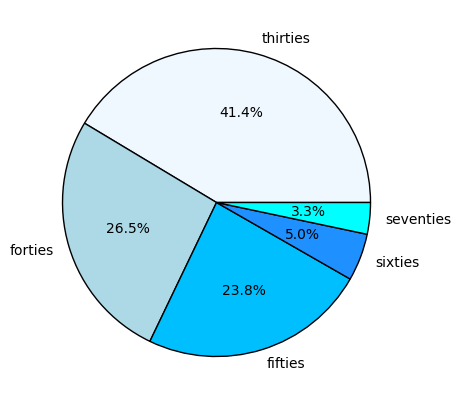

In [31]:
# use custom colors
pie(labels=["thirties","forties","fifties","sixties", "seventies"], values=values,
       colors=["aliceblue", "lightblue", "deepskyblue", "dodgerblue", "cyan"])

---